# Covid 19 vaccination analysis by Sanjeev Kumar

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set(color_codes = True)
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Importing and getting to know the data


In [2]:
file_path = ('country_vaccinations.csv')
data = pd.read_csv(file_path) #parse_dates=['date']
data.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.766800e+04,1.682500e+04,1.405600e+04,1.461000e+04,3.131500e+04,17668.000000,16825.000000,14056.000000,31315.000000
mean,1.240539e+07,5.822263e+06,3.366567e+06,2.296473e+05,1.163343e+05,29.738031,19.384460,12.542610,3452.016957
std,6.878632e+07,2.147658e+07,1.254347e+07,1.260373e+06,8.483272e+05,35.368054,20.860233,16.033151,4571.311823
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.290522e+05,1.014510e+05,4.866350e+04,4.355500e+03,8.540000e+02,3.020000,2.600000,1.330000,417.000000
50%,9.130615e+05,6.517070e+05,3.706940e+05,2.148850e+04,6.555000e+03,14.855000,10.940000,5.680000,1879.000000
75%,4.328477e+06,2.876633e+06,1.686008e+06,9.585425e+04,3.613800e+04,45.262500,31.410000,18.012500,5189.000000
max,1.456557e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31559 non-null  object 
 1   iso_code                             31559 non-null  object 
 2   date                                 31559 non-null  object 
 3   total_vaccinations                   17668 non-null  float64
 4   people_vaccinated                    16825 non-null  float64
 5   people_fully_vaccinated              14056 non-null  float64
 6   daily_vaccinations_raw               14610 non-null  float64
 7   daily_vaccinations                   31315 non-null  float64
 8   total_vaccinations_per_hundred       17668 non-null  float64
 9   people_vaccinated_per_hundred        16825 non-null  float64
 10  people_fully_vaccinated_per_hundred  14056 non-null  float64
 11  daily_vaccinations_per_milli

# Dropping not needed columns source name and source website

In [5]:
data = data.drop(['source_name', 'source_website'], axis=1)
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


#  Countries in the data set

In [6]:
countries = data['country'].unique()

print ('There are', len(countries), 'in the dataset.', '\n') 
print ('The following countries can be found in the dataset:','\n','\n', countries)

There are 219 in the dataset. 

The following countries can be found in the dataset: 
 
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 

# Get the latest reporting date

In [7]:

latest = list(data['date'].unique())
latest.sort(reverse=True)
latest = latest[0]
print('The latest date in the dataset is {}'.format (latest))


#create a dataframe from the latest date: data_latest_date

data_latest_date = data[data['date'] == latest]
data_latest_date.head()

The latest date in the dataset is 7/9/2021


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
137,Afghanistan,AFG,7/9/2021,NaN,NaN,NaN,NaN,7128.0,NaN,NaN,NaN,183.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
323,Albania,ALB,7/9/2021,1016554.0,584832.0,431722.0,5257.0,5008.0,35.32,20.32,15.00,1740.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
626,Andorra,AND,7/9/2021,NaN,NaN,NaN,NaN,121.0,NaN,NaN,NaN,1566.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
760,Angola,AGO,7/9/2021,NaN,NaN,NaN,NaN,5193.0,NaN,NaN,NaN,158.0,Oxford/AstraZeneca
919,Anguilla,AIA,7/9/2021,16951.0,9321.0,7630.0,NaN,70.0,112.99,62.13,50.86,4666.0,Oxford/AstraZeneca


# What country has vaccinated more people

In [8]:
total_vaccinations = data.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)
df_total_vaccinations = pd.DataFrame(total_vaccinations).reset_index()
df_total_vaccinations_15 = df_total_vaccinations.iloc[:15, :]
df_total_vaccinations_15

,country,total_vaccinations
0,China,1.456557e+09
1,India,4.049317e+08
2,United States,3.377404e+08
3,Brazil,1.241139e+08
4,Germany,8.561543e+07
5,United Kingdom,8.226670e+07
6,Japan,7.005120e+07
7,England,6.894402e+07
8,Turkey,6.343245e+07
9,France,6.317486e+07


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


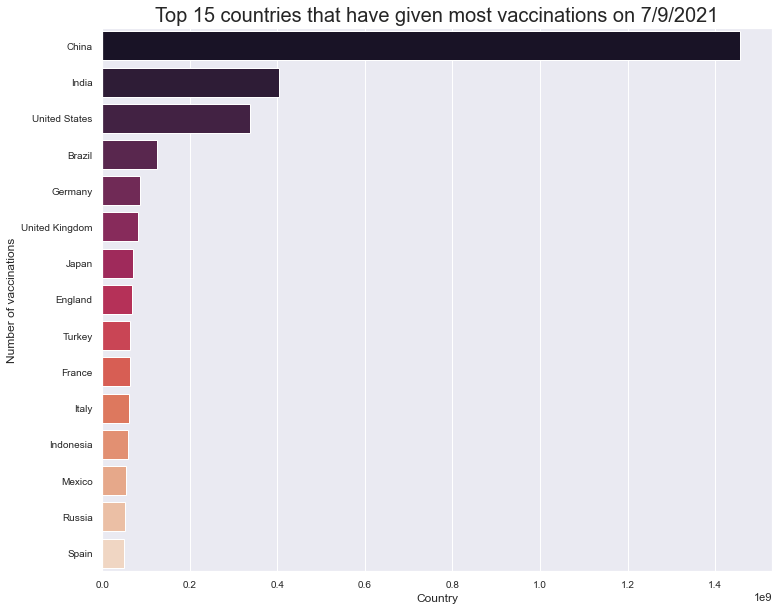

In [9]:
size_label=12
size_ticks = 10
size_title= 20

plt.figure(figsize=(12,10))
sns.barplot('total_vaccinations','country', data=df_total_vaccinations_15, orient='h', palette="rocket")

plt.title('Top 15 countries that have given most vaccinations on {}'.format(latest), size=size_title)
plt.xlabel('Country', size=size_label)
plt.ylabel('Number of vaccinations', size=size_label)
plt.xticks(size=size_ticks)
plt.yticks(size=size_ticks)

plt.show()

# creating the data for next two plots

In [10]:

vaccinations_per_hundred = data.groupby('country')['people_vaccinated_per_hundred'].max().sort_values(ascending=False)
vaccinations_per_hundred = pd.DataFrame(vaccinations_per_hundred).reset_index()
vaccinations_per_hundred_15 = vaccinations_per_hundred.iloc[:15,:]


full_vaccinations_per_hundred = data.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False)
full_vaccinations_per_hundred = pd.DataFrame(full_vaccinations_per_hundred).reset_index()
full_vaccinations_per_hundred_15 = full_vaccinations_per_hundred.iloc[:15,:]

<AxesSubplot:title={'center':'Top 15 countries people fully vaccinated'}, xlabel='people_fully_vaccinated_per_hundred', ylabel='country'>

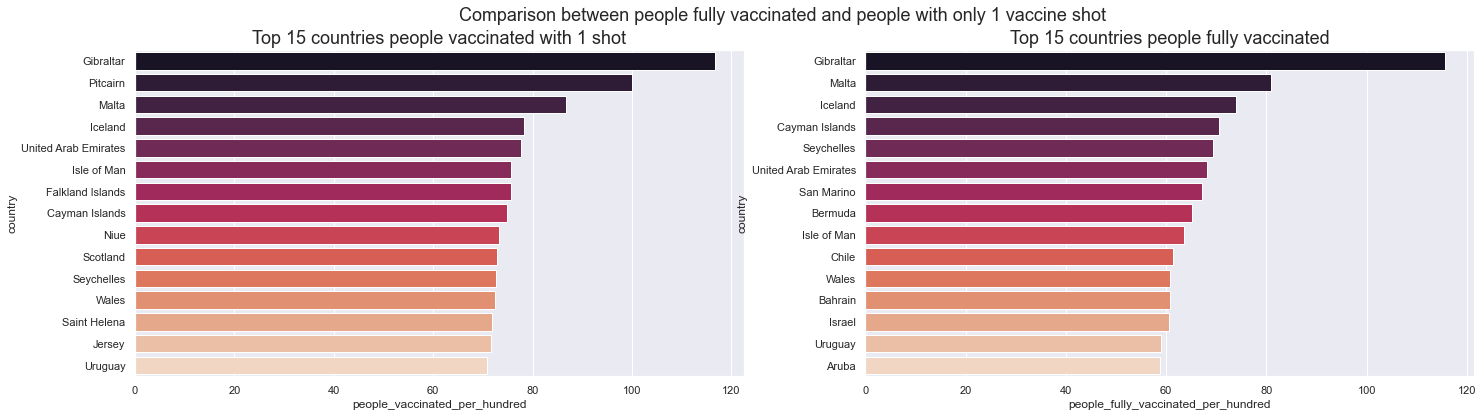

In [11]:
# number of vaccinations in percent of the total population
# column: people_fully_vaccinated_per_hundred vs people_vaccinated_per_hundred
# make a subplot with these two columns per country (or best 15 countries) or make both columns in one figure
size = 18
fig, ax = plt.subplots(1,2, figsize=(24,6))
fig.suptitle('Comparison between people fully vaccinated and people with only 1 vaccine shot', size = size)
ax[0].set_title('Top 15 countries people vaccinated with 1 shot', size = size)
ax[1].set_title('Top 15 countries people fully vaccinated', size = size)

sns.barplot(ax=ax[0],x='people_vaccinated_per_hundred',y='country', data=vaccinations_per_hundred_15, orient='h',palette="rocket")
sns.barplot(ax=ax[1],x='people_fully_vaccinated_per_hundred',y='country', data=full_vaccinations_per_hundred_15, palette="rocket" ,orient='h')

# Filter dataset for selected countries

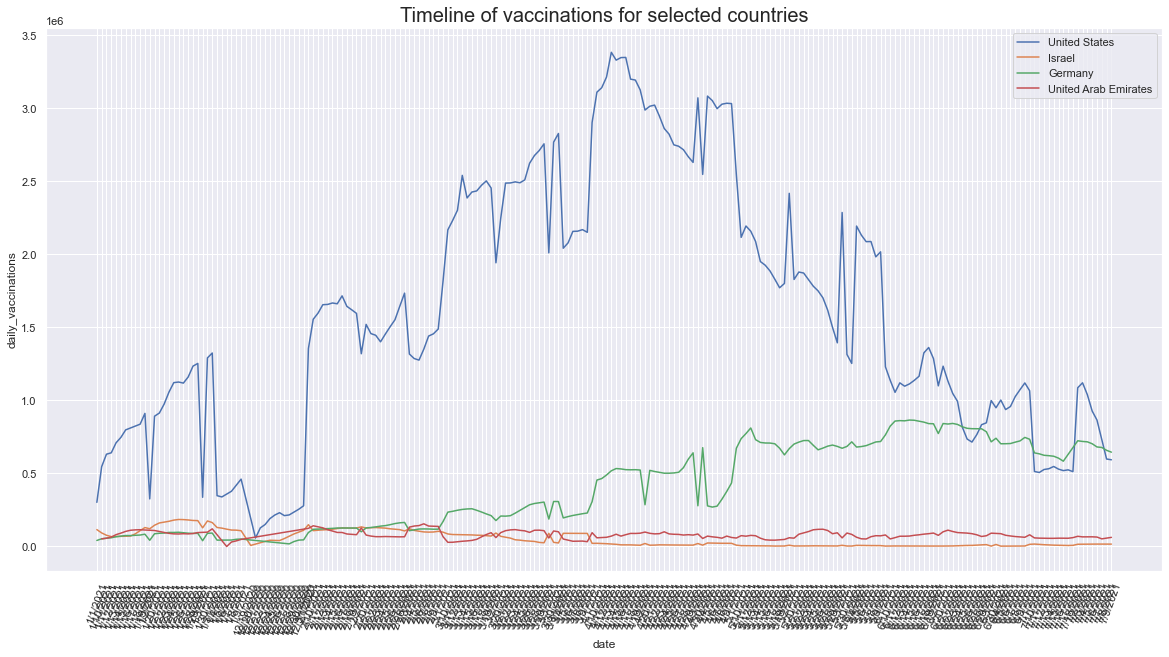

In [12]:

selected_countries = ['Israel', 'Germany', 'United States', 'United Arab Emirates']
data_countries = data[data['country'].isin(selected_countries)].sort_values(by='date', ascending=True)


plt.figure(1, figsize=(20,10))
sns.lineplot(x='date',y='daily_vaccinations', hue='country', data = data_countries)
plt.xticks(rotation=70)
plt.title('Timeline of vaccinations for selected countries', size=20)
plt.legend()
plt.show()

In [13]:
country_vaccine = pd.DataFrame(data.groupby('vaccines')['country'].unique()).reset_index().sort_values(by='vaccines', ascending=True)
country_vaccine.head()

,vaccines,country
0,"Abdala, Soberana02",[Cuba]
1,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Chile]
2,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Mexico]
3,"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing...",[Pakistan]
4,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",[China]


# Splitting the vaccine column and creating one list with all mentioned vaccines

In [14]:


vaccines_split = data['vaccines'].str.split(',')

# Create a list of all vaccines
all_vaccines = []
for item in vaccines_split:
    for vaccine in item:
        all_vaccines.append(vaccine.strip())
        
# Replacing Sinopharm/Beijing and Sinopharm/Wuhan with Sinopharm
all_vaccines = [vaccine.replace('Sinopharm/Beijing', 'Sinopharm').replace('Sinopharm/Wuhan', 'Sinopharm') for vaccine in all_vaccines]


# Joining the list where all items are separated by whitespace
all_vaccines_joined = ' '.join(all_vaccines)
all_vaccines_joined[:300]

'Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinopharm Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinopharm Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinopharm Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinopharm Johnson&Johnson Oxford/AstraZeneca Pfizer/BioNTech Sinop'

# Plotting a WordCloud with all used vaccines

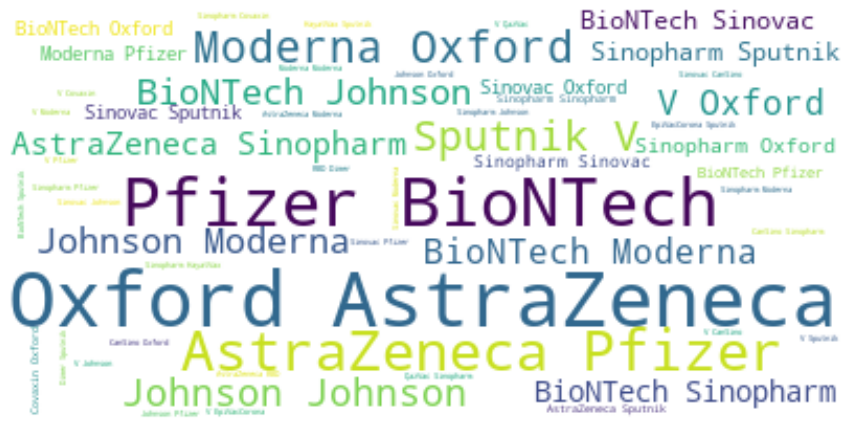

In [15]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(all_vaccines_joined)

plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordCloud,  interpolation="bilinear")
plt.show()

#  Create count for vaccines in the list 'all_vaccines' to calculate percentage

In [16]:
from collections import Counter 

d = Counter(all_vaccines) 

# Print all occurences in ascending order
for key, value in sorted(d.items(), key=lambda x: x[1], reverse=True):
    print('{} occured {} times in the list'.format(key, value))

Oxford/AstraZeneca occured 25478 times in the list
Pfizer/BioNTech occured 19079 times in the list
Moderna occured 10195 times in the list
Sinopharm occured 8814 times in the list
Sputnik V occured 6984 times in the list
Johnson&Johnson occured 5637 times in the list
Sinovac occured 5330 times in the list
CanSino occured 792 times in the list
Covaxin occured 776 times in the list
EpiVacCorona occured 217 times in the list
QazVac occured 169 times in the list
Sinopharm/HayatVax occured 169 times in the list
RBD-Dimer occured 91 times in the list
Abdala occured 59 times in the list
Soberana02 occured 59 times in the list


#  Create a DataFrame out of the Counter object

In [17]:
vaccine_count = pd.DataFrame.from_dict(d, orient='index').reset_index()
vaccine_count.rename(columns={'index':'vaccine', 0:'count_vaccine'}, inplace=True)
vaccine_count.head()

,vaccine,count_vaccine
0,Johnson&Johnson,5637
1,Oxford/AstraZeneca,25478
2,Pfizer/BioNTech,19079
3,Sinopharm,8814
4,Sinovac,5330


#  Create a pie chart to display the most mentioned vaccins

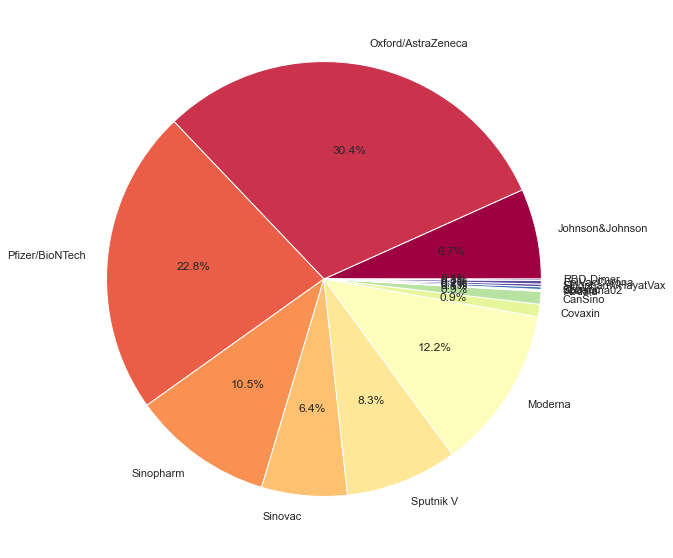

In [18]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 60)]

plt.figure(1, figsize=(20,10))
plt.pie(vaccine_count['count_vaccine'], labels=vaccine_count['vaccine'], autopct='%1.1f%%', colors=colors)
plt.show()